In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import random

In [2]:
file = r"C:\Users\PcLaptop\Dropbox (Politecnico Di Torino Studenti)\Aplanet_\plot madrid\all_Madrid.xlsx"

xl= pd.ExcelFile(file)      # Load spreadsheet
df = xl.parse('Sheet1')    # Load a sheet into a DataFrame by name: df1
df.index  = np.arange(len(df))
#df=df.iloc[:, [2,33,34,42,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208]]

In [3]:
v=[]
for i in df['mod']:
    if math.isnan(i) is True:
        v.append('-')
    elif i==1:
        v.append('No information')
    elif i==2:
        v.append('Congestion and pollution')
    elif i==3:
        v.append('Public services')
    elif i==4:
        v.append('Redistribution')
df.insert(loc=1, column='Treatment', value=v)
#df.drop(['mod'], inplace=True, axis=1)


In [4]:
v=[]
for i in df['player.trip_mode']:
    if math.isnan(i) is True:
        v.append('-')
    elif (i==0 or i==1 or i==8):
        v.append('Car')
    else:
        v.append('Public transport')
df.insert(loc=4, column='Trip_chosen_mode', value=v)

In [5]:
v=[]
for i in df['player.trip_mode']:
    if math.isnan(i) is True:
        v.append('-')
    elif (i==0 or i==1 or i==8):
        v.append('Car')
    elif (i==5 or i==6 or i==7 or i==10):
        v.append('Light transport')
    else:
        v.append('Public transport')
df.insert(loc=5, column='Trip_mode', value=v)

In [6]:
v=[]
for i in df['player.trip_alternative_mode']:
    if math.isnan(i) is True:
        v.append('-')
    elif (i==0 or i==1 or i==8):
        v.append('Car')
    elif (i==5 or i==6 or i==7 or i==10):
        v.append('Light transport')
    else:
        v.append('Public transport')
df.insert(loc=7, column='Trip_alt_mode', value=v)

In [7]:
pd.set_option('display.max_columns', None)
df

,Unnamed: 0,Treatment,participant.id_in_session,mod,Trip_chosen_mode,Trip_mode,participant.code,Trip_alt_mode,participant.time_started,player.inequality_perception,What type of society do you think is Spain today – which diagram comes the closest?,player.inequality_wish,What do you think Spain ought to be like – which would you prefer?,player.income_distribution,How fair do you think the wealth distribution is in your country?,player.postal_code,participant._municipality,The participant lives in Madrid:,player.driving_license,Do you have a driver license?,player.access_to_car,Do you own or have access to a car?,player.car_type,What kind of vehicle do you have access to? If you have access to multiple vehicles choose the one you use the most.,player.access_to_bike,Do you own or have access to a bike (electric or regular)?,player.access_to_motorbyke,Do you own or have access to a motorbyke?,player.access_to_scooter,Do you own or have access to a e-scooter?,player.employ_status,What is your employment status?,player.trip_destination,player.trip_purpose,What is the purpose/destination of this trip?,player.trip_other,player.trip_moment,At what time of the day do you typically travel?,player.trip_mode,By which mode do you travel with during this trip? If you travel with multiple modes choose the mode that takes you the longest time.,player.mode_other,player.trip_traffic,How are the traffic conditions normally on the trip?,player.trip_time,What is the approximate travel time of this trip (one way)?,player.trip_cost,"What is the approximate cost of this trip (fuel, road tolls, parking, ticket price etc.), one way? If you are traveling by public transport and have a period ticket, please consider the average price per trip.",player.trip_alternative_mode,"If you were to make this trip using a different mode of travel than your usual mode, which would be the best alternative?",player.trip_alternative_rate,How would you rate your alternative?,player.trip_alternative_justification,player.control_question,Answer to control question:,player.alternative1,Alternative 1,player.alternative2,Alternative 2,player.alternative3,Alternative 3,player.alternative4,Alternative 4,player.alternative5,Alternative 5,1_policy_choice,1_What is your preferred policy type?,1_Price_UR_A,"1_A_Price in urban areas, rush hour",1_Price_UN_A,"1_A_Price in urban areas, outside rush hour",1_Price_O_A,1_A_Price outside urban areas,1_EV_A,1_A_Price for electric vehicles,1_Revenue_A,1_A_Use of revenue,1_Price_UR_B,"1_B_Price in urban areas, rush hour",1_Price_UN_B,"1_B_Price in urban areas, outside rush hour",1_Price_O_B,1_B_Price outside urban areas,1_EV_B,1_B_Price for electric vehicles,1_Revenue_B,1_B_Use of revenue,2_policy_choice,2_What is your preferred policy type?,2_Price_UR_A,"2_A_Price in urban areas, rush hour",2_Price_UN_A,"2_A_Price in urban areas, outside rush hour",2_Price_O_A,2_A_Price outside urban areas,2_EV_A,2_A_Price for electric vehicles,2_Revenue_A,2_A_Use of revenue,2_Price_UR_B,"2_B_Price in urban areas, rush hour",2_Price_UN_B,"2_B_Price in urban areas, outside rush hour",2_Price_O_B,2_B_Price outside urban areas,2_EV_B,2_B_Price for electric vehicles,2_Revenue_B,2_B_Use of revenue,3_policy_choice,3_What is your preferred policy type?,3_Price_UR_A,"3_A_Price in urban areas, rush hour",3_Price_UN_A,"3_A_Price in urban areas, outside rush hour",3_Price_O_A,3_A_Price outside urban areas,3_EV_A,3_A_Price for electric vehicles,3_Revenue_A,3_A_Use of revenue,3_Price_UR_B,"3_B_Price in urban areas, rush hour",3_Price_UN_B,"3_B_Price in urban areas, outside rush hour",3_Price_O_B,3_B_Price outside urban areas,3_EV_B,3_B_Price for electric vehicles,3_Revenue_B,3_B_Use of revenue,4_policy_choice,4_What is your preferred policy type?,4_Price_UR_A,"4_A_Price in urban areas, rush hour",4_Price_UN_A,"4_A_Price in urban areas, outside rush hour",4_Price_O_A,4_A_Price outside urban areas,4_EV_A,4_A_Price for electric vehicles,4_Revenue_A,4_A_Use of revenue,4_Pri

In [8]:
#len(df[(df["High EE High NE"]==df["Low EE High NE"]) & (df["High EE High NE"]==df["Low EE Low NE"]) & (df["High EE High NE"]==df["High EE Low NE"])])

In [9]:
a=df
b=df

for i in range(len(a)):
    if a['player.SN_car_A'][i]!=1:
        a=a.drop(i)
#a.index  = np.arange(len(a))
for i in range(len(b)):
    if b['player.SN_car_A'][i]!=0:
        b=b.drop(i)
#b.index  = np.arange(len(b))

b[['player.EE','player.PNB','player.NE',"player.HH","player.HL", "player.LH", "player.LL"]]=b[['player.EE','player.PNB','player.NE',"player.HH","player.HL", "player.LH", "player.LL"]].apply(lambda x: 100-x)
z=pd.concat([a, b], axis=0).sort_index(axis=0)

#25+66+23+67

In [10]:
df.insert(loc=201, column='player.adj.EE', value=z['player.EE'])
df.insert(loc=204, column='player.adj.PNB', value=z['player.PNB'])
df.insert(loc=207, column='player.adj.NE', value=z['player.NE'])
df.insert(loc=212, column='player.adj.HH', value=z['player.HH'])
df.insert(loc=215, column='player.adj.HL', value=z['player.HL'])
df.insert(loc=218, column='player.adj.LH', value=z['player.LH'])
df.insert(loc=221, column='player.adj.LL', value=z['player.LL'])

In [11]:
#df.to_excel('all_madrid_adj.xlsx')

In [12]:
z=z.rename(columns={"player.HH": "High EE High NE","player.HL": "High EE Low NE", "player.LH": "Low EE High NE","player.LL": "Low EE Low NE"})
#df=z[['player.EE','player.PNB','player.NE',"High EE High NE","High EE Low NE", "Low EE High NE", "Low EE Low NE"]]

In [13]:
c=df
p=df
l=df

for i in range(len(df)):
    if c['Trip_mode'][i]!='Car':
        c=c.drop(i)
#a.index  = np.arange(len(a))
for i in range(len(df)):
    if p['Trip_mode'][i]!='Light transport':
        p=p.drop(i)
#b.index  = np.arange(len(b))
for i in range(len(df)):
    if l['Trip_mode'][i]!='Light transport':
        l=l.drop(i)

In [14]:
z1=pd.melt(z, id_vars=['Treatment','player.SN_car_A','Trip_chosen_mode'], value_vars=["High EE High NE","High EE Low NE", "Low EE High NE", "Low EE Low NE"],var_name='Expectations', value_name='Conditional choice')

In [15]:
df=df.rename(columns={"player.HH": "High EE High NE","player.HL": "High EE Low NE", "player.LH": "Low EE High NE","player.LL": "Low EE Low NE"})

df1=df
df2=df
df3=df
df4=df

for i in range(len(df)):
    if df1['mod'][i]!=1:
        df1=df1.drop(i)
    if df2['mod'][i]!=2:
        df2=df2.drop(i)
    if df3['mod'][i]!=3:
        df3=df3.drop(i)
    if df4['mod'][i]!=4:
        df4=df4.drop(i)
df1.index  = np.arange(len(df1))
df2.index  = np.arange(len(df2))
df3.index  = np.arange(len(df3))
df4.index  = np.arange(len(df4))

a=[df1,df2,df3,df4]
b=[df1,df2,df3,df4]
for k in range(4):
    for i in range(len(a[k])):
        if a[k]['player.SN_car_A'][i]!=1:
            a[k]=a[k].drop(i)
    a[k].index  = np.arange(len(a[k]))
    for i in range(len(b[k])):
        if b[k]['player.SN_car_A'][i]!=0:
            b[k]=b[k].drop(i)
    b[k].index  = np.arange(len(b[k]))
    
for k in range(4):
    b[k][['player.EE','player.PNB','player.NE',"High EE High NE","High EE Low NE", "Low EE High NE", "Low EE Low NE"]]=b[k][['player.EE','player.PNB','player.NE',"High EE High NE","High EE Low NE", "Low EE High NE", "Low EE Low NE"]].apply(lambda x: 100-x)

In [16]:
def consistency(x):
    v_sum=[]
    #v_sum_m=[]
    #vec=np.concatenate(([100 for i in range(int(len(x)/2))],[0 for i in range(int(np.ceil(len(x)/2)))])) 
    
    for p in range(len(x)):
        summ=0
        #sum_m = 0
        ee= x['player.EE'][p]
        ne= x['player.NE'][p]
        
        for q in range(len(x)):
            summ = summ + abs(ee-x['player.EE'][q]) + abs(ne-x['player.NE'][q])
            #sum_m = sum_m + 2*abs(vec[p]-vec[q])
        v_sum = np.append(v_sum,summ)
    s = sum(v_sum)/(2*2*100*int(len(x)/2)*(np.ceil(len(x)/2)))
    #s = sum(v_sum)/sum(v_sum_m)
    c = 1-s
    return c

In [17]:
def accuracy(x):
    summ=0
    summ_m=0
    vec=np.concatenate(([100 for i in range(int(len(x)/2))],[0 for i in range(int(np.ceil(len(x)/2)))]))
    count_car = 100*x['Trip_chosen_mode'].value_counts()['Car']/len(x)
    PNB_tot = 100*((x['player.PNB'] > 50).sum())/(len(x))
    
    for p in range(len(x)):
        summ_m = summ_m + abs(vec[p]-np.mean(vec)) + abs(vec[p]-np.mean(vec)) 
        summ = summ + abs(x['player.EE'][p]-count_car) + abs(x['player.NE'][p]-PNB_tot)
    s = summ/summ_m
    acc = 1-s
    return acc

In [18]:
def specificity(x):
    summ=0
    summ_m=0
    vec=np.concatenate(([100 for i in range(int(len(x)/2))],[0 for i in range(int(np.ceil(len(x)/2)))]))
    
    for p in range(len(x)):
        summ_m = summ_m + abs(vec[p]-np.mean(vec)) + abs(vec[p]-np.mean(vec)) 
        summ = summ + abs(x['player.EE'][p]-np.mean(x['player.EE'])) + abs(x['player.NE'][p]-np.mean(x['player.NE']))
    s = summ/summ_m
    spe = 1-s
    return spe

In [19]:
accuracy(b[0])

0.5570661157024794

In [20]:
def norm_strenght(c,a,s):
    n=c*a*s
    return n

In [21]:
treatment=3

norm_strenght(consistency(b[treatment]),accuracy(b[treatment]),specificity(b[treatment]))

0.20568126851962837

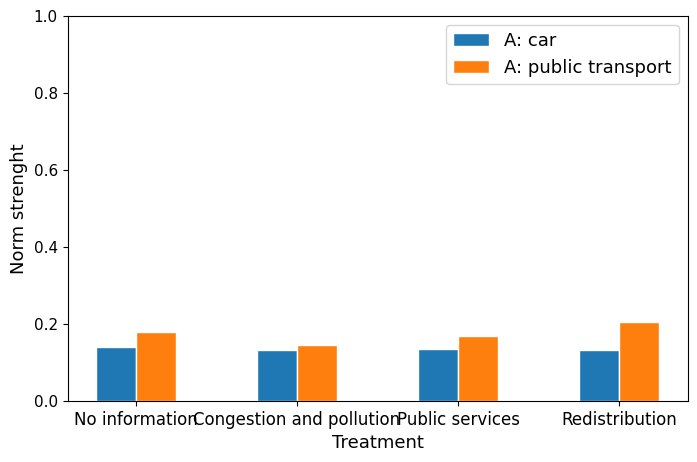

In [22]:
#norm_strenght

v=[]
w=[]
for i in range(4):
    v=np.append(v,norm_strenght(consistency(a[i]),accuracy(a[i]),specificity(a[i])))
    w=np.append(w,norm_strenght(consistency(b[i]),accuracy(b[i]),specificity(b[i])))

fig=plt.figure(figsize=(8,5))
barWidth = 0.25

bars1=v
bars2=w

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

plt.bar(r1, bars1, width=barWidth, edgecolor='white', label='A: car')
plt.bar(r2, bars2, width=barWidth, edgecolor='white', label='A: public transport')
 
plt.xticks([r + barWidth/2 for r in range(len(bars1))], ['No information', 'Congestion and pollution','Public services','Redistribution'], fontsize=12)
plt.yticks(fontsize=11)
plt.xlabel('Treatment', fontsize=13)
plt.ylabel('Norm strenght', fontsize=13)
plt.ylim([0,1])
plt.legend(fontsize=13)

#plt.savefig("Norm_strenght_Madrid.png")
plt.show()

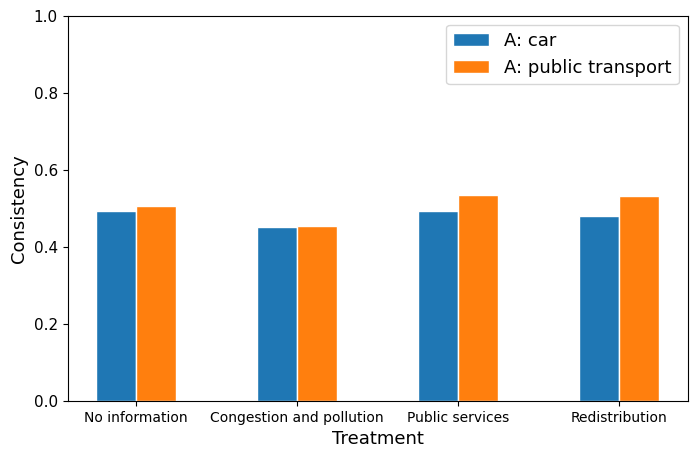

In [23]:
#consistency

h=[]
l=[]
for i in range(4):
    h=np.append(h,consistency(a[i]))
    l=np.append(l,consistency(b[i]))

fig=plt.figure(figsize=(8,5))
barWidth = 0.25

bars1=h
bars2=l

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

plt.bar(r1, bars1, width=barWidth, edgecolor='white', label='A: car')
plt.bar(r2, bars2, width=barWidth, edgecolor='white', label='A: public transport')
 
plt.xticks([r + barWidth/2 for r in range(len(bars1))], ['No information', 'Congestion and pollution','Public services','Redistribution'], fontsize=10)
plt.yticks(fontsize=11)
plt.xlabel('Treatment', fontsize=13)
plt.ylabel('Consistency', fontsize=13)
plt.ylim([0,1])
plt.legend(fontsize=13)

#plt.savefig("Consistency_Madrid.png")
plt.show()

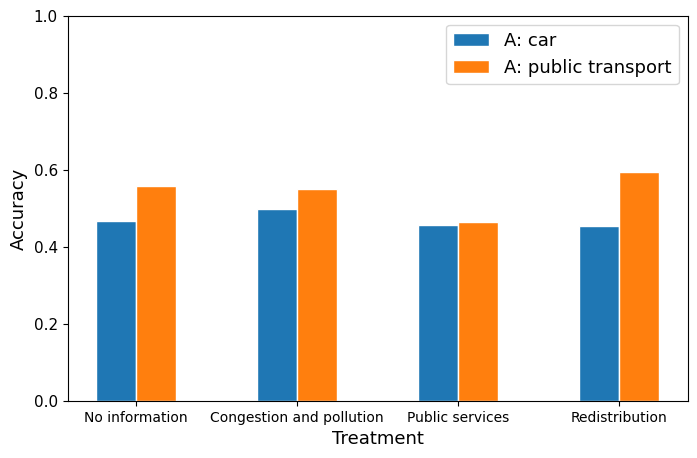

In [24]:
#accuracy

m=[]
n=[]
for i in range(4):
    m=np.append(m,accuracy(a[i]))
    n=np.append(n,accuracy(b[i]))
    
fig=plt.figure(figsize=(8,5))
barWidth = 0.25

bars1=m
bars2=n

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

plt.bar(r1, bars1, width=barWidth, edgecolor='white', label='A: car')
plt.bar(r2, bars2, width=barWidth, edgecolor='white', label='A: public transport')
 
plt.xticks([r + barWidth/2 for r in range(len(bars1))], ['No information', 'Congestion and pollution','Public services','Redistribution'], fontsize=10)
plt.yticks(fontsize=11)
plt.xlabel('Treatment', fontsize=13)
plt.ylabel('Accuracy', fontsize=13)
plt.ylim([0,1])
plt.legend(fontsize=13)

#plt.savefig("Accuracy_Madrid.png")
plt.show()

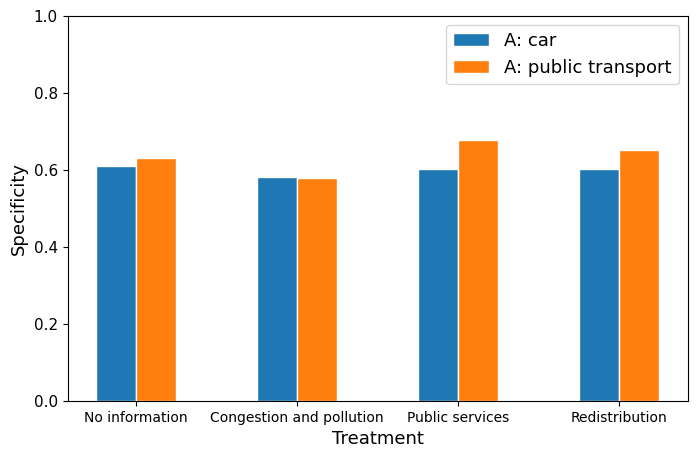

In [25]:
#specificity

o=[]
p=[]
for i in range(4):
    o=np.append(o,specificity(a[i]))
    p=np.append(p,specificity(b[i]))
    
fig=plt.figure(figsize=(8,5))
barWidth = 0.25

bars1=o
bars2=p

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

plt.bar(r1, bars1, width=barWidth, edgecolor='white', label='A: car')
plt.bar(r2, bars2, width=barWidth, edgecolor='white', label='A: public transport')
 
plt.xticks([r + barWidth/2 for r in range(len(bars1))], ['No information', 'Congestion and pollution','Public services','Redistribution'], fontsize=10)
plt.yticks(fontsize=11)
plt.xlabel('Treatment', fontsize=13)
plt.ylabel('Specificity', fontsize=13)
plt.ylim([0,1])
plt.legend(fontsize=13)

#plt.savefig("Specificity_Madrid.png")
plt.show()

In [26]:
EEa=[[],[],[],[]]
NEa=[[],[],[],[]]
EEb=[[],[],[],[]]
NEb=[[],[],[],[]]
for k in range(4):
    for i in range(len(a[k])):
        EEa[k] = np.append(EEa[k],(a[k]['High EE High NE'][i]-a[k]['Low EE High NE'][i] + a[k]['High EE Low NE'][i]-a[k]['Low EE Low NE'][i])/2)
        NEa[k] = np.append(NEa[k],(a[k]['High EE High NE'][i]-a[k]['High EE Low NE'][i] + a[k]['Low EE High NE'][i]-a[k]['Low EE Low NE'][i])/2)

    for i in range(len(b[k])):
        EEb[k] = np.append(EEb[k],(b[k]['High EE High NE'][i]-b[k]['Low EE High NE'][i] + b[k]['High EE Low NE'][i]-b[k]['Low EE Low NE'][i])/2)
        NEb[k] = np.append(NEb[k],(b[k]['High EE High NE'][i]-b[k]['High EE Low NE'][i] + b[k]['Low EE High NE'][i]-b[k]['Low EE Low NE'][i])/2) 

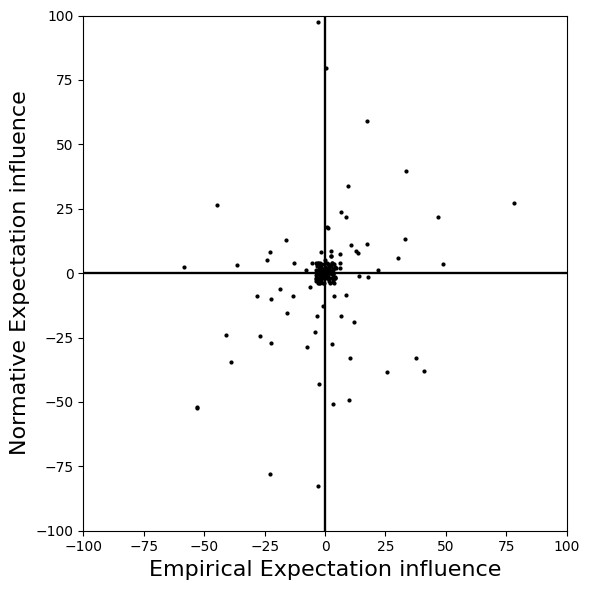

In [27]:
plt.figure(figsize=(6,6))
for k in range(4):
    #plt.figure(figsize=(7,7))
    plt.plot(EEa[k]+np.random.uniform(-4,4,len(EEa[k])),NEa[k]+np.random.uniform(-4,4,len(EEa[k])),'ko',label='Private car',markersize=2)
    plt.plot(EEb[k]+np.random.uniform(-4,4,len(EEb[k])),NEb[k]+np.random.uniform(-4,4,len(EEb[k])),'ko',label='100 - Public transport',markersize=2)
    plt.xlabel("Empirical Expectation influence",fontsize=16)
    plt.ylabel("Normative Expectation influence",fontsize=16)
    plt.axhline(0, color='k')
    plt.axvline(0, color='k')
    #plt.title('Treatment %d' %(k+1),fontsize=16)
    plt.xlim([-100,100])
    plt.ylim([-100,100])
    #plt.legend(fontsize=12)
    plt.tight_layout()
#plt.savefig(r'C:\Users\Sara\Dropbox (Politecnico Di Torino Studenti)\Aplanet_\tott.png')
plt.show()